**Group-08**<br/>
<font style="color:red"> **Belhassen Ghoul <br/> Robin Ehrensperger <br/> Dominic Diedenhofen**</font>

In [2]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [3]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [4]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    #CS = plt.contour(X, Y, Z, V, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [5]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [6]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


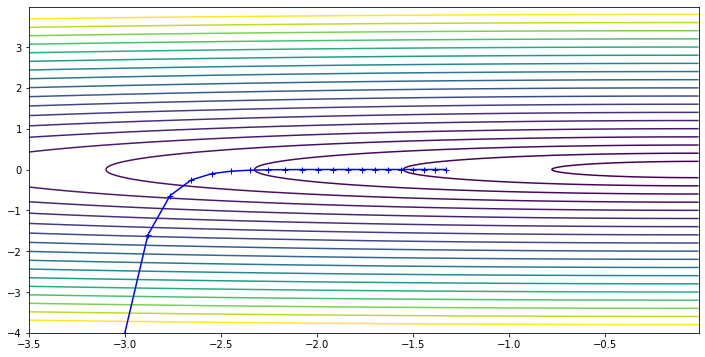

In [7]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point.  

* Study SGD for different learning rates.
* Compare Momentum for different momentum parameters and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov? 
* Play with different settings for the parameter $\beta_1$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Experiment with different learning rates. Can you experimentally verify that Adam is less sensitive to the choice of the learning rate than e.g. SGD?
* Identify your best parameters for each of the models above - for the given example. How many steps are needed with these settings to reach the minimum of the function at (0,0) within an accuracy of 1.0e-3


<font style="color:red"> <h3> Different Learning Rates </h3> </font>

SGD - 0.100000  2.294, (-2.294, -0.046)
SGD - 0.200000  1.747, (-1.747, -0.000)
SGD - 0.300000  1.326, (-1.326, -0.000)
SGD - 0.400000  1.002, (-1.002, -0.000)
SGD - 0.500000  0.755, (-0.755,  0.000)
SGD - 0.600000  0.566, (-0.566, -0.000)
SGD - 0.700000  0.423, (-0.423, -0.000)
SGD - 0.800000  0.314, (-0.314, -0.000)
SGD - 0.900000  0.237, (-0.233, -0.046)
SGD - 1.000000  4.004, (-0.171, -4.000)


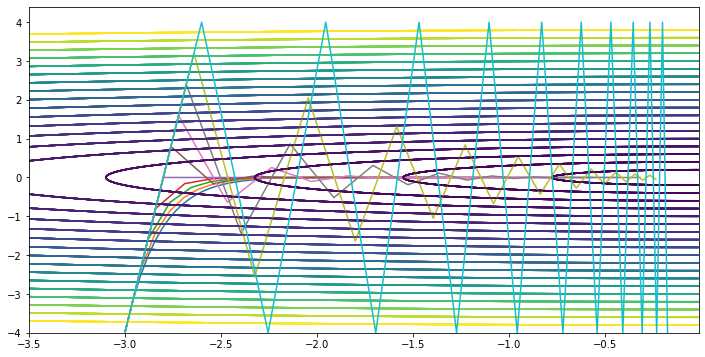

In [8]:
nepochs = 20
for lr in np.arange(start = 0.1 , stop = 1.1, step= 0.1):
    plt.figure(1,figsize=(12,6))
    plot_contours([-3.5,0.,-4.,4.], 4., test_function)
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.SGD([x],lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist)
    print("SGD - %f"%(lr), error(xhist,yhist))


<font style="color:red"> **best LR is 0.9** </font>

<font style="color:red"> <h3> Different Momentum </h3> </font>

SGD - 0.3 | Momentum - 0.100000  1.209, (-1.209, -0.000)
SGD - 0.3 | Momentum - 0.200000  1.076, (-1.076,  0.000)
SGD - 0.3 | Momentum - 0.300000  0.921, (-0.921, -0.000)
SGD - 0.3 | Momentum - 0.400000  0.742, (-0.742, -0.000)
SGD - 0.3 | Momentum - 0.500000  0.532, (-0.532, -0.002)
SGD - 0.3 | Momentum - 0.600000  0.284, (-0.284, -0.007)
SGD - 0.3 | Momentum - 0.700000  0.009, ( 0.009, -0.003)
SGD - 0.3 | Momentum - 0.800000  0.380, ( 0.360,  0.122)
SGD - 0.3 | Momentum - 0.900000  1.187, ( 0.827,  0.852)
SGD - 0.3 | Momentum - 1.000000  3.976, ( 1.716,  3.586)


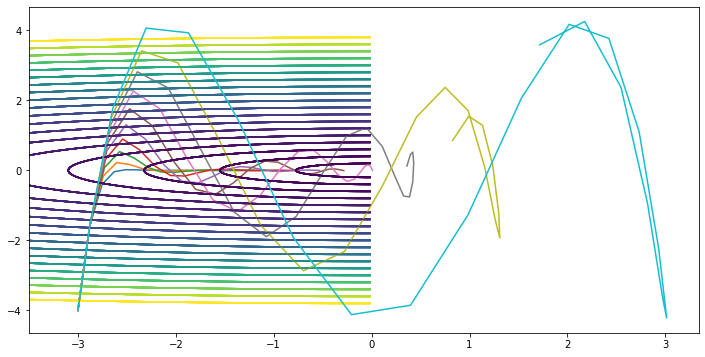

In [16]:
nepochs = 20
for m in np.arange(start = 0.1 , stop = 1.1, step= 0.1):
    plt.figure(1,figsize=(12,6))
    plot_contours([-3.5,0.,-4.,4.], 4., test_function)
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.SGD([x],lr=0.3,momentum= m)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist)
    print("SGD - 0.3 | Momentum - %f"%(m), error(xhist,yhist))

<font style="color:red"> it's how I expected, higher value higher impact and momentum **best Momentum: 0.7**</font>

<font style="color:red"><h3> With Nesterov </h3></font>

SGD - 0.3 | Momentum - 0.100000  1.209, (-1.209, -0.000)
SGD - 0.3 | Momentum - 0.200000  1.075, (-1.075,  0.000)
SGD - 0.3 | Momentum - 0.300000  0.924, (-0.924,  0.000)
SGD - 0.3 | Momentum - 0.400000  0.750, (-0.750,  0.000)
SGD - 0.3 | Momentum - 0.500000  0.550, (-0.550,  0.000)
SGD - 0.3 | Momentum - 0.600000  0.321, (-0.321, -0.000)
SGD - 0.3 | Momentum - 0.700000  0.059, (-0.059, -0.000)
SGD - 0.3 | Momentum - 0.800000  0.229, ( 0.229, -0.000)
SGD - 0.3 | Momentum - 0.900000  0.542, ( 0.542, -0.000)
SGD - 0.3 | Momentum - 1.000000  0.947, ( 0.947, -0.001)


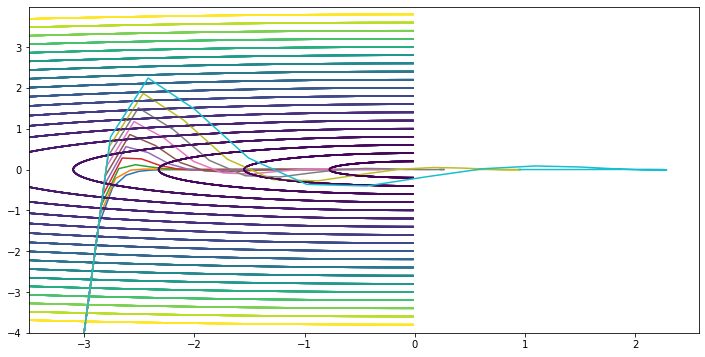

In [10]:
nepochs = 20
for m in np.arange(start = 0.1 , stop = 1.1, step= 0.1):
    plt.figure(1,figsize=(12,6))
    plot_contours([-3.5,0.,-4.,4.], 4., test_function)
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.SGD([x],lr=0.3,momentum= m, nesterov=True)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist)
    print("SGD - 0.3 | Momentum - %f"%(m), error(xhist,yhist))

<font style="color:red"> very nice to see which effect Nesterov has... it smoothes the Momentum! **Best Momentum 0.7 but higher loss** </font>

<font style="color:red"><h3> Different $\beta_1$ </h3></font>


SGD - 0.3 | beta 1 - -4.000000  1.326, (-1.326, -0.000)
SGD - 0.3 | beta 1 - -3.500000  1.326, (-1.326, -0.000)
SGD - 0.3 | beta 1 - -3.000000  1.326, (-1.326, -0.000)
SGD - 0.3 | beta 1 - -2.500000  1.326, (-1.326, -0.000)
SGD - 0.3 | beta 1 - -2.000000  1.326, (-1.326, -0.000)
SGD - 0.3 | beta 1 - -1.500000  1.326, (-1.326, -0.000)
SGD - 0.3 | beta 1 - -1.000000  1.326, (-1.326, -0.000)
SGD - 0.3 | beta 1 - -0.500000  1.326, (-1.326, -0.000)
SGD - 0.3 | beta 1 - 0.000000  1.326, (-1.326,  0.000)
SGD - 0.3 | beta 1 - 0.500000  1.326, (-1.326,  0.000)
SGD - 0.3 | beta 1 - 1.000000  1.326, (-1.326,  0.000)
SGD - 0.3 | beta 1 - 1.500000  1.326, (-1.326,  0.000)
SGD - 0.3 | beta 1 - 2.000000  1.326, (-1.326,  0.000)
SGD - 0.3 | beta 1 - 2.500000  1.326, (-1.326,  0.000)
SGD - 0.3 | beta 1 - 3.000000  1.326, (-1.326,  0.000)
SGD - 0.3 | beta 1 - 3.500000  1.326, (-1.326,  0.000)


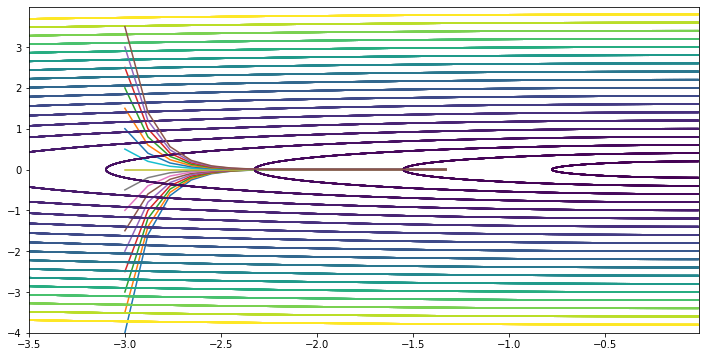

In [11]:
nepochs = 20
for b1 in np.arange(start = -4.0 , stop = 4.0, step= 0.5):
    plt.figure(1,figsize=(12,6))
    plot_contours([-3.5,0.,-4.,4.], 4., test_function)
    # initial value
    x = torch.tensor([-3.0,b1]).requires_grad_()

    optimizer = torch.optim.SGD([x],lr=0.3)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist)
    print("SGD - 0.3 | beta 1 - %f"%(b1), error(xhist,yhist))


<font style="color:red"> the different $\beta_1$ settings **doesn't change anything for the error** it just change the derection from where it come from above, below or streight. In the case where $\beta_1$ is 0 it loses the Momentum </font>


<font style="color:red"><h3> Adam </h3></font>


SGD - 0.100000  2.362, (-1.119, -2.080)
SGD - 0.110000  2.125, (-0.951, -1.900)
SGD - 0.120000  1.895, (-0.788, -1.723)
SGD - 0.130000  1.673, (-0.630, -1.550)
SGD - 0.140000  1.460, (-0.478, -1.379)
SGD - 0.150000  1.258, (-0.334, -1.213)
SGD - 0.160000  1.068, (-0.196, -1.050)
SGD - 0.170000  0.894, (-0.066, -0.892)
SGD - 0.180000  0.740, ( 0.055, -0.738)
SGD - 0.190000  0.612, ( 0.169, -0.589)
SGD - 0.200000  0.522, ( 0.273, -0.445)
SGD - 0.210000  0.479, ( 0.368, -0.306)
SGD - 0.220000  0.486, ( 0.454, -0.174)
SGD - 0.230000  0.533, ( 0.531, -0.047)
SGD - 0.240000  0.602, ( 0.598,  0.074)
SGD - 0.250000  0.682, ( 0.655,  0.188)
SGD - 0.260000  0.764, ( 0.704,  0.296)
SGD - 0.270000  0.843, ( 0.744,  0.397)
SGD - 0.280000  0.917, ( 0.775,  0.491)
SGD - 0.290000  0.985, ( 0.798,  0.578)
SGD - 0.300000  1.046, ( 0.813,  0.658)
SGD - 0.310000  1.100, ( 0.821,  0.731)
SGD - 0.320000  1.145, ( 0.823,  0.797)
SGD - 0.330000  1.183, ( 0.817,  0.856)
SGD - 0.340000  1.214, ( 0.806,  0.908)


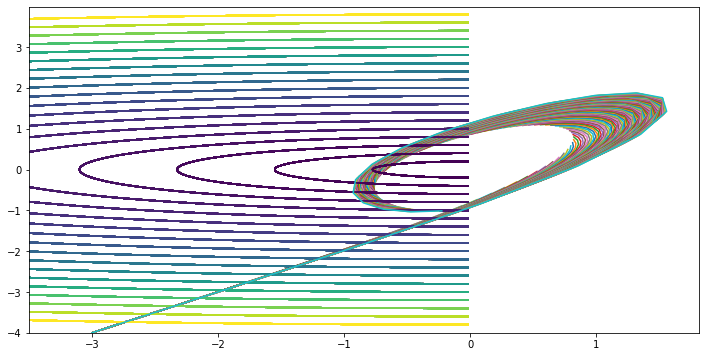

In [12]:
nepochs = 20
for lr in np.arange(start = 0.1 , stop = 1.1, step= 0.01):
    plt.figure(1,figsize=(12,6))
    plot_contours([-3.5,0.,-4.,4.], 4., test_function)
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.Adam([x],lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist)
    print("SGD - %f"%(lr), error(xhist,yhist))


<font style="color:red"> WOW! very nice how we can see here with Adam it doesn't matter where you set you LR it will go the same path! **Best LR for Adam is 0.22**</font>


Adam - LR = 0.22, Betas = (0.26,0.44)  0.001, ( 0.001, -0.000)


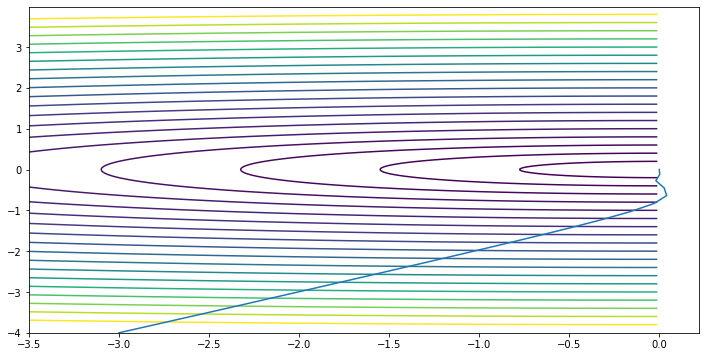

In [13]:
nepochs = 20
plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.Adam([x],lr=0.22, betas=(0.26,0.44))
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist)
print("Adam - LR = 0.22, Betas = (0.26,0.44)", error(xhist,yhist))


<font style="color:red"> To achieve the 1e-3 is quiet difficult with the others without to increase the epochs. I could achieve it with Adam </font>
